In [1]:
# Welcome to MoCChA - Mathematics on Computers for Chemistry Applications!
#
# This notebook calculates the change Delta_F, given a differential df = fx * dx + fy * dy.
# We approximate Delta_F by taking finite steps in x and y and summing up the changes df.
# 
# This cell defines the differential df and the curve along which we're calculating the change.
# Feel free to experiment. You can change any line marked with "<---" below to change one of the parameters.
# For example, you can choose a different differential to calculate or a different path along which to sum up df.
# Or, you can change the numerical accuracy by varying the step size that determines the 
# finite steps with which we approximate dx and dy.
#
#
# Hit Shift-Enter to execute each cell.
#

# You can ignore the following four lines. They are necessary to load some libraries and set up the calculation. 
import sympy
from sympy import *
# tell the computer that x and y are variables
x, y = sympy.symbols('x y')

###### MODIFY BELOW ########

### Define the differential df ###
# df = fx * dx  +  fy * dy
fx = 0.5*y**2       # <--- modify here to change fx
fy = x*y       # <--- modify here to change fy

### Defines the pathway along which we sum up the change ###

# We specify the pathway by specifying a function y(x). 
# We're going to sum up Delta_F along the curve defined by y(x).
y_of_x = x # <--- modify here to change path

# x_start is the x-value of the start point for the path
x_start = 0 # <--- modify here to change starting point
# x_end is the x-value where the path ends
x_end = 1 # <--- modify here to change end point

# Our program is going to calculate the change in f by summing up small changes df along the path defined by y(x).
# stepsize is the size of steps we're going to take 
stepsize = 0.1 # <--- modify here to change finite step size

Here's the path along which we're going to sum up df:


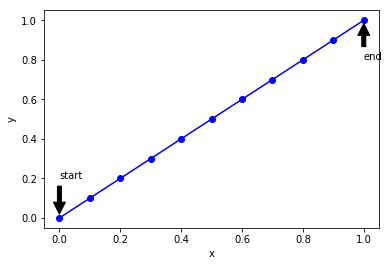

In [2]:
# You can ignore the code in this section. Just look at the output below. 
# The plot below shows the path along which we're going to sum up the change Delta_F.
#
# Note: Plotting may take 5-10 seconds, so have patience ;)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sympy.utilities.lambdify import lambdify

X = np.arange(x_start, x_end+stepsize, stepsize) #
func = lambdify(x, y_of_x,'numpy')
Y = func(X)
plt.plot(X,Y,'bo-')
plt.ylabel("y")
plt.xlabel("x")
print("Here's the path along which we're going to sum up df:")
plt.annotate('start', xy=(X[0], Y[0]), xytext=(X[0], Y[0]+0.2),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.annotate('end', xy=(X[-1], Y[-1]), xytext=(X[-1], Y[-1]-0.2),
            arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [3]:
# Now we're going to calculate the change df along the path.

# makes steps along the pathway y(x), calculate fx and fy for each point, 
Delta_f = 0
Npoints = len(X)
print("Pt.No.    x0    y0  fx(x0,y0)  fy(x0,y0)  Delta_x  Delta_y  Delta_f")
print("-------------------------------------------------------------------")
for i in range(1, Npoints):
    x0 = X[i]
    y0 = Y[i]
    fx0 = fx.subs({x: x0, y: y0}).evalf()
    fy0 = fy.evalf(subs={x:x0,y:y0})
    DeltaX = x0 - X[i-1]
    DeltaY = y0 - Y[i-1]
    Delta_f += fx0 * DeltaX + fy0 * DeltaY
    print("%6d %5.1f %5.1f %10.1f %10.1f %8.1f %8.1f %8.1f" % (i,x0,y0,fx0,fy0,DeltaX,DeltaY,Delta_f))

print("Change Delta_f approximated by summing over %d finite steps:   %16.3f" % (Npoints, Delta_f))

Pt.No.    x0    y0  fx(x0,y0)  fy(x0,y0)  Delta_x  Delta_y  Delta_f
-------------------------------------------------------------------
     1   0.1   0.1        0.0        0.0      0.1      0.1      0.0
     2   0.2   0.2        0.0        0.0      0.1      0.1      0.0
     3   0.3   0.3        0.0        0.1      0.1      0.1      0.0
     4   0.4   0.4        0.1        0.2      0.1      0.1      0.0
     5   0.5   0.5        0.1        0.2      0.1      0.1      0.1
     6   0.6   0.6        0.2        0.4      0.1      0.1      0.1
     7   0.7   0.7        0.2        0.5      0.1      0.1      0.2
     8   0.8   0.8        0.3        0.6      0.1      0.1      0.3
     9   0.9   0.9        0.4        0.8      0.1      0.1      0.4
    10   1.0   1.0        0.5        1.0      0.1      0.1      0.6
Change Delta_f approximated by summing over 11 finite steps:              0.578
